
--- First 5 Rows of the Dataset ---
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

--- Last 5 Rows of the Dataset ---
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

--- Dataset Shape (Rows, Columns) ---
(200, 4)

--- Column Names ---
Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

--- Data Types and Non-Null Counts ---
<class '

C:\Users\youss\AppData\Local\Temp\ipykernel_19320\3719809363.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=dataset, palette='pastel')


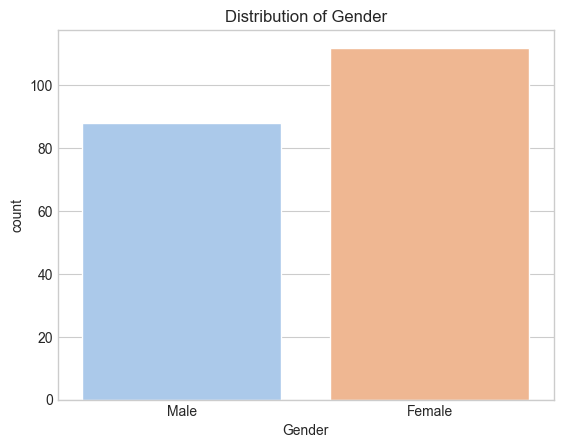


--- Distribution of Age ---


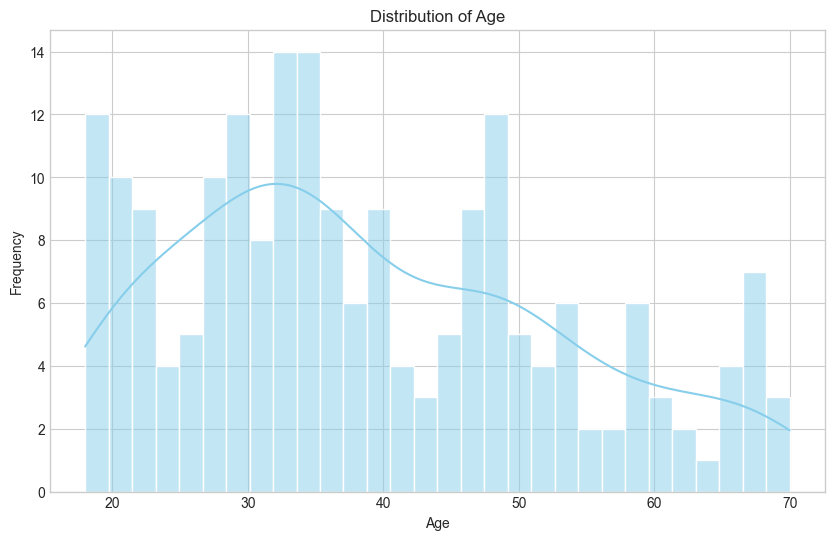


--- Correlation Matrix (Numerical Features) ---


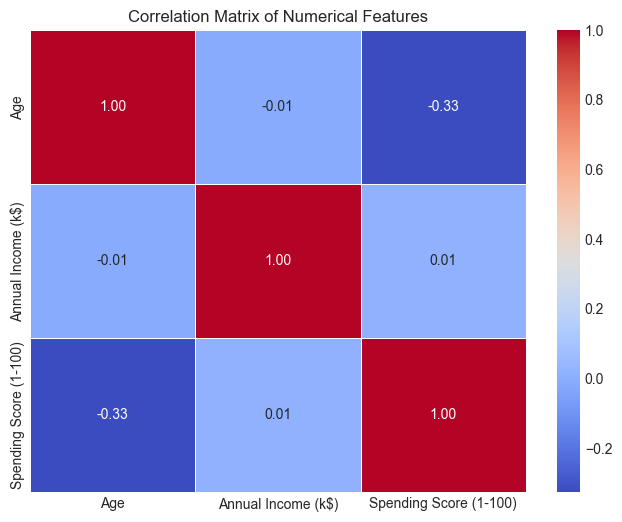

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [6]:
import numpy as np
import pandas as pd
# from mpl_toolkits.axes_grid1.axes_size import AxesX # Not used in this initial exploration
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is great for statistical visualizations
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Set a nice style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")

# --- 1. Load Dataset ---

dataset = pd.read_csv('Mall_Customers.csv') # read the CSV
dataset.drop('CustomerID', axis=1, inplace=True)

# --- 2. Explore its Structure and Understand its Features ---

print("\n--- First 5 Rows of the Dataset ---")
print(dataset.head())

print("\n--- Last 5 Rows of the Dataset ---")
print(dataset.tail())

print("\n--- Dataset Shape (Rows, Columns) ---")
print(dataset.shape)

print("\n--- Column Names ---")
print(dataset.columns)

print("\n--- Data Types and Non-Null Counts ---")
dataset.info()

# --- 3. Initial Analysis to Assess Data Quality and Preprocessing Needs ---

print("\n--- Descriptive Statistics (Numerical Features) ---")
print(dataset.describe())

print("\n--- Descriptive Statistics (Categorical Features) ---")
# For object/categorical columns, describe() gives count, unique, top (most frequent), and freq (frequency of top).
print(dataset.describe(include=['object', 'category']))

print("\n--- Checking for Missing Values ---")
missing_values = dataset.isnull().sum()
print(missing_values)
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(f"Total missing values: {missing_values.sum()}")

print("\n--- Checking for Duplicate Rows ---")
duplicate_rows = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    print("Consider dropping duplicate rows using: dataset.drop_duplicates(inplace=True)")

# --- Understanding Individual Features ---

# Gender: Categorical feature.
print("\n--- Value Counts for Gender ---")
print(dataset['Gender'].value_counts())
sns.countplot(x='Gender', data=dataset, palette='pastel')
plt.title('Distribution of Gender')
plt.show()

# Age: Numerical feature.
print("\n--- Distribution of Age ---")
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Identify Numerical Features---
numerical_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

print("\n--- Correlation Matrix (Numerical Features) ---")
correlation_matrix = dataset[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print(correlation_matrix)

In [7]:
#SCALING--

#Rename columns
dataset.rename(columns={
    'Annual Income (k$)': 'Annual_Income_k',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

# Identify Numerical Features for Scaling ---
numerical_features = ['Age', 'Annual_Income_k', 'Spending_Score']
print(f"\nNumerical features to be scaled: {numerical_features}")

# Separate numerical data for scaling
data_to_scale = dataset[numerical_features]

# Keep categorical data separate (if any)
categorical_features = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical features (not scaled): {categorical_features}")
if categorical_features:
    categorical_data = dataset[categorical_features]
else:
    categorical_data = None # No categorical columns left besides the ones being scaled


# --- 3. Apply StandardScaler ---
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the numerical data (calculates mean and std dev)
# and transform the data (applies the scaling formula)
# fit_transform combines both steps
scaled_data_array = scaler.fit_transform(data_to_scale)

# The output 'scaled_data_array' is a NumPy array.
# It's often convenient to convert it back to a DataFrame with original column names.
scaled_df = pd.DataFrame(scaled_data_array, columns=numerical_features, index=dataset.index) # Use original index

print("\n--- Scaled Numerical Data (First 5 Rows) ---")
print(scaled_df.head())

print("\nDescriptive Statistics (After Scaling):")
# Mean should be close to 0, std dev close to 1
print(scaled_df.describe())

# --- 4. Combine Scaled Numerical Data with Categorical Data (Optional but common) ---
# Create the final preprocessed DataFrame
if categorical_data is not None:
    preprocessed_dataset = pd.concat([categorical_data, scaled_df], axis=1)
else:
    preprocessed_dataset = scaled_df # If no categorical columns were present

print("\n--- Final Preprocessed Dataset (with Scaled Features) ---")
print(preprocessed_dataset.head())



Numerical features to be scaled: ['Age', 'Annual_Income_k', 'Spending_Score']
Categorical features (not scaled): ['Gender']

--- Scaled Numerical Data (First 5 Rows) ---
        Age  Annual_Income_k  Spending_Score
0 -1.424569        -1.738999       -0.434801
1 -1.281035        -1.738999        1.195704
2 -1.352802        -1.700830       -1.715913
3 -1.137502        -1.700830        1.040418
4 -0.563369        -1.662660       -0.395980

Descriptive Statistics (After Scaling):
                Age  Annual_Income_k  Spending_Score
count  2.000000e+02     2.000000e+02    2.000000e+02
mean  -1.021405e-16    -2.131628e-16   -1.465494e-16
std    1.002509e+00     1.002509e+00    1.002509e+00
min   -1.496335e+00    -1.738999e+00   -1.910021e+00
25%   -7.248436e-01    -7.275093e-01   -5.997931e-01
50%   -2.045351e-01     3.587926e-02   -7.764312e-03
75%    7.284319e-01     6.656748e-01    8.851316e-01
max    2.235532e+00     2.917671e+00    1.894492e+00

--- Final Preprocessed Dataset (with Sca


--- Data Reduced to 2 Principal Components ---
   Principal Component 1  Principal Component 2
0              -0.615720              -1.763481
1              -1.665793              -1.820747
2               0.337862              -1.674799
3              -1.456573              -1.772430
4              -0.038465              -1.662740

Explained variance by Principal Component 1: 0.4427
Explained variance by Principal Component 2: 0.3331
Total variance explained by 2 components: 0.7757


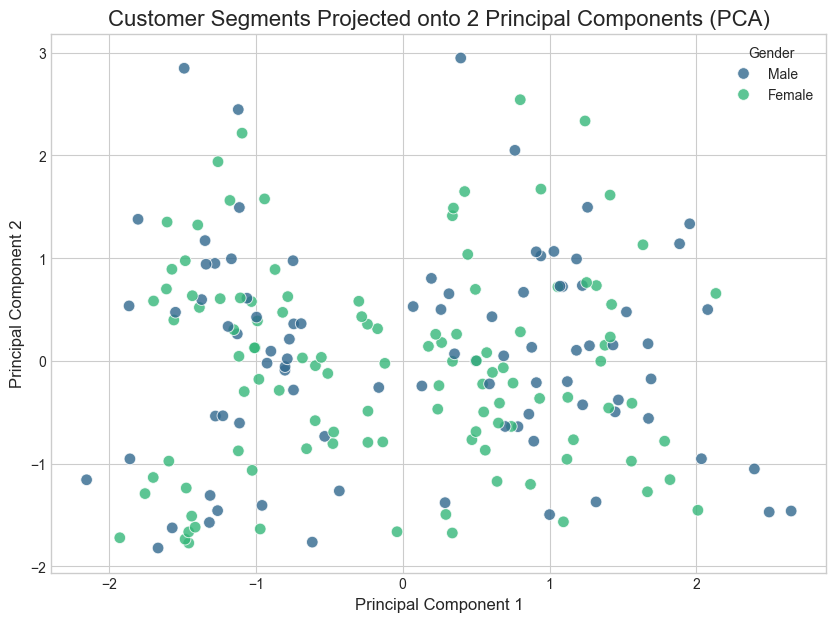

In [8]:
# --- 5. Apply PCA ---

# Initialize PCA, requesting 2 components
pca = PCA(n_components=2)

# Fit PCA on the scaled data and transform it
# pca.fit() learns the principal components
# pca.transform() projects the data onto these components
principal_components = pca.fit_transform(scaled_df)

# Create a new DataFrame with the principal components
# Name the columns PCA1 and PCA2 for clarity
pca_df = pd.DataFrame(data=principal_components,
                      columns=['Principal Component 1', 'Principal Component 2'],
                      index=dataset.index) # Keep original index

print("\n--- Data Reduced to 2 Principal Components ---")
print(pca_df.head())

# Check explained variance
explained_variance_ratio = pca.explained_variance_ratio_
print(f"\nExplained variance by Principal Component 1: {explained_variance_ratio[0]:.4f}")
print(f"Explained variance by Principal Component 2: {explained_variance_ratio[1]:.4f}")
print(f"Total variance explained by 2 components: {explained_variance_ratio.sum():.4f}")

# --- 6. Visualize the 2D PCA Results ---

plt.figure(figsize=(10, 7))
# Create scatter plot using the PCA results
# Color the points by the 'Gender' column from the original dataset
# We use dataset['Gender'] aligned by the index with pca_df
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    data=pca_df,
    hue=dataset['Gender'], # Color points based on Gender
    palette='viridis',      # Color scheme
    s=70,                  # Point size
    alpha=0.8              # Point transparency
)

plt.title('Customer Segments Projected onto 2 Principal Components (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='Gender')
plt.show()


--- Calculating Inertia for Elbow Method ---
Inertia for k=1: 465.45
Inertia for k=2: 254.84
Inertia for k=3: 177.23
Inertia for k=4: 122.91
Inertia for k=5: 99.25
Inertia for k=6: 80.89
Inertia for k=7: 69.41
Inertia for k=8: 59.18
Inertia for k=9: 50.16
Inertia for k=10: 43.47


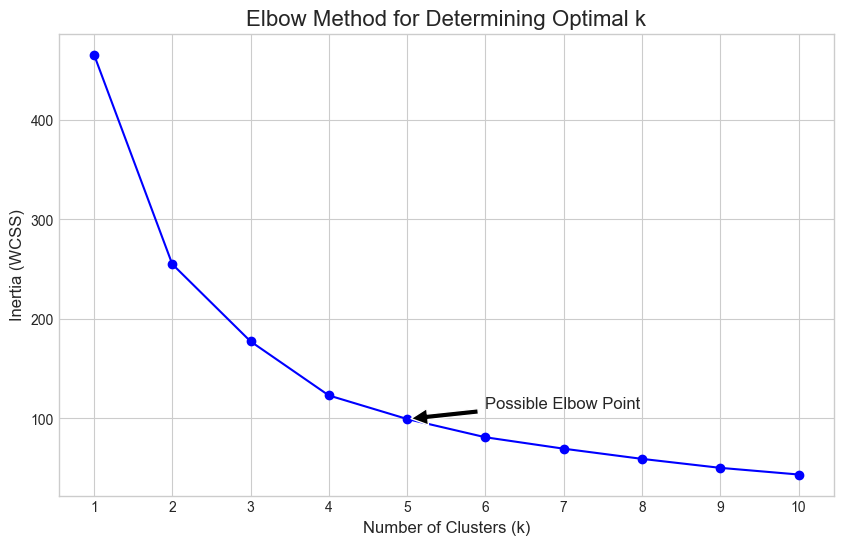


--- Elbow Method Analysis ---
Observe the plot above. The 'elbow' point is where the rate of decrease in inertia sharply changes.
This point suggests a reasonable trade-off between the number of clusters and the variance explained within each cluster.
Based on visual inspection of the plot, choose the optimal 'k' where the elbow occurs.


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 7. Determine Optimal Number of Clusters using Elbow Method ---

# Data to use for clustering is the 2D PCA result
data_for_clustering = pca_df

# Define the range of potential clusters (k) to test
k_range = range(1, 11) # Test k from 1 up to 10 clusters

# List to store the inertia (Within-Cluster Sum of Squares - WCSS) for each k
inertia_values = []

print("\n--- Calculating Inertia for Elbow Method ---")
# Calculate inertia for each k
for k in k_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k,
                    init='k-means++',   # Smart initialization
                    n_init=10,          # Run 10 times with different seeds
                    max_iter=300,       # Max iterations per run
                    random_state=42)    # For reproducibility

    # Fit KMeans to the data
    kmeans.fit(data_for_clustering)

    # Append the inertia to the list
    inertia_values.append(kmeans.inertia_)
    print(f"Inertia for k={k}: {kmeans.inertia_:.2f}")

# --- Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method for Determining Optimal k', fontsize=16)
plt.xticks(k_range)
plt.grid(True)

# Annotate the likely elbow point (visual inspection)
# This often requires judgment, e.g., k=4 or k=5 might look like elbows here
plt.annotate('Possible Elbow Point', xy=(5, inertia_values[4]), xytext=(6, inertia_values[3]*0.9), # Adjust coordinates as needed based on plot
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

plt.show()

print("\n--- Elbow Method Analysis ---")
print("Observe the plot above. The 'elbow' point is where the rate of decrease in inertia sharply changes.")
print("This point suggests a reasonable trade-off between the number of clusters and the variance explained within each cluster.")
print("Based on visual inspection of the plot, choose the optimal 'k' where the elbow occurs.")
# Common choices for this dataset are often k=4 or k=5 based on the elbow plot.

In [10]:
# --- Continuation from Elbow Method ---
# Assume data_for_clustering (pca_df) and optimal k determination happened.

# --- 8. Train K-Means Model with Optimal k ---

# **** IMPORTANT ****
# Set optimal_k based on your observation of the elbow plot from the previous step.
# Common values for this dataset after PCA are 4 or 5. Let's assume 5 for this example.
optimal_k = 5
print(f"\n--- Training K-Means with optimal_k = {optimal_k} ---")

# Initialize K-Means with the chosen optimal k
kmeans_final = KMeans(n_clusters=optimal_k,
                      init='k-means++',
                      n_init=10,
                      max_iter=300,
                      random_state=42) # Use the same random state for consistency

# Fit the final model to the data (the 2D PCA results)
kmeans_final.fit(data_for_clustering)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans_final.labels_

# Get the coordinates of the final cluster centers (in the PCA space)
cluster_centers = kmeans_final.cluster_centers_

print(f"K-Means model trained successfully with {optimal_k} clusters.")
print("Cluster centers (in PCA space):")
print(cluster_centers)
print("\nFirst 10 cluster assignments for data points:")
print(cluster_labels[:10])

# --- Add the cluster labels back to the PCA DataFrame (optional but useful) ---
pca_df_with_clusters = pca_df.copy() # Create a copy to avoid modifying the original
pca_df_with_clusters['Cluster'] = cluster_labels
print("\n--- PCA DataFrame with Cluster Assignments ---")
print(pca_df_with_clusters.head())

# You can also add the cluster labels back to the original (scaled) dataset
# or even the initial dataset if needed for interpretation.
# Make sure indices align if combining across different processing stages.
# Example: Adding to the dataset that includes Gender
# preprocessed_dataset_with_clusters = preprocessed_dataset.copy() # Assumes preprocessed_dataset exists
# preprocessed_dataset_with_clusters['Cluster'] = cluster_labels
# print(preprocessed_dataset_with_clusters.head())


--- Training K-Means with optimal_k = 5 ---
K-Means model trained successfully with 5 clusters.
Cluster centers (in PCA space):
[[ 1.09697628 -0.59078397]
 [-0.49176835  0.01616075]
 [ 1.03849522  1.1199511 ]
 [-1.32287898  1.09155054]
 [-1.29455069 -1.31287414]]

First 10 cluster assignments for data points:
[4 4 0 4 4 4 0 4 0 4]

--- PCA DataFrame with Cluster Assignments ---
   Principal Component 1  Principal Component 2  Cluster
0              -0.615720              -1.763481        4
1              -1.665793              -1.820747        4
2               0.337862              -1.674799        0
3              -1.456573              -1.772430        4
4              -0.038465              -1.662740        4


In [11]:
# --- Continuation from K-Means Training ---
# Assume data_for_clustering (pca_df) and optimal_k are available.

from sklearn.cluster import AgglomerativeClustering

# --- 9. Apply Agglomerative Hierarchical Clustering ---

# Use the same optimal_k determined earlier (e.g., 5)
# optimal_k = 5 # This should already be defined from the previous step

print(f"\n--- Applying Agglomerative Clustering with n_clusters = {optimal_k} ---")

# Initialize Agglomerative Clustering
# linkage='ward' minimizes the variance within each cluster, often a good default.
# Other options include 'average', 'complete', 'single'.
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k,
                                        linkage='ward') # Affinity defaults to 'euclidean'

# Fit the model and get the cluster labels directly
# For AgglomerativeClustering, fitting also assigns labels immediately.
agg_labels = agg_clustering.fit_predict(data_for_clustering)

print(f"Agglomerative Clustering model fitted successfully with {optimal_k} clusters.")
print("Linkage method used: 'ward'")
print("\nFirst 10 cluster assignments (Agglomerative):")
print(agg_labels[:10])

# --- Add Agglomerative cluster labels to the PCA DataFrame (optional) ---
# Create a new column to store these labels for comparison
pca_df_with_clusters['Agglomerative_Cluster'] = agg_labels
print("\n--- PCA DataFrame with K-Means and Agglomerative Cluster Assignments ---")
print(pca_df_with_clusters.head())

# Note: Unlike K-Means, standard AgglomerativeClustering doesn't compute cluster 'centers'
# in the same way (it builds a hierarchy). Centroids could be calculated manually
# after assignment if needed (e.g., mean of points in each cluster).


--- Applying Agglomerative Clustering with n_clusters = 5 ---
Agglomerative Clustering model fitted successfully with 5 clusters.
Linkage method used: 'ward'

First 10 cluster assignments (Agglomerative):
[2 2 1 2 1 2 1 2 1 2]

--- PCA DataFrame with K-Means and Agglomerative Cluster Assignments ---
   Principal Component 1  Principal Component 2  Cluster  \
0              -0.615720              -1.763481        4   
1              -1.665793              -1.820747        4   
2               0.337862              -1.674799        0   
3              -1.456573              -1.772430        4   
4              -0.038465              -1.662740        4   

   Agglomerative_Cluster  
0                      2  
1                      2  
2                      1  
3                      2  
4                      1  


In [12]:
# --- Continuation from Agglomerative Clustering ---
# Assume data_for_clustering (pca_df), optimal_k, and pca_df_with_clusters are available.

from sklearn.mixture import GaussianMixture

# --- 10. Apply Gaussian Mixture Model (GMM) ---

# Use the same optimal_k determined earlier (e.g., 5)
# optimal_k = 5 # This should already be defined

print(f"\n--- Applying Gaussian Mixture Model (GMM) with n_components = {optimal_k} ---")

# Initialize Gaussian Mixture Model
# n_components is equivalent to the number of clusters
# covariance_type='full' allows each component to have its own general covariance matrix.
# Other options: 'tied', 'diag', 'spherical'
gmm = GaussianMixture(n_components=optimal_k,
                      covariance_type='full',
                      random_state=42) # For reproducibility

# Fit the GMM model to the data
gmm.fit(data_for_clustering)

# --- Get GMM Results ---

# Get the hard cluster assignments (most likely cluster for each point)
gmm_labels = gmm.predict(data_for_clustering)

# Get the soft cluster assignments (probabilities for each point belonging to each cluster)
gmm_probabilities = gmm.predict_proba(data_for_clustering)

print(f"GMM model fitted successfully with {optimal_k} components.")
print("Covariance type used: 'full'")
print("\nFirst 10 hard cluster assignments (GMM):")
print(gmm_labels[:10])

print("\nFirst 5 soft cluster probability assignments (GMM):")
# Display probabilities rounded for readability
print(gmm_probabilities[:5].round(3))
# Each row sums to 1. Each column corresponds to a component (cluster).
# The value indicates the probability of that data point belonging to that component.

# --- Add GMM cluster labels and probabilities to the DataFrame (optional) ---
pca_df_with_clusters['GMM_Cluster'] = gmm_labels
# Optionally add the probability of the assigned cluster
# Find the max probability for each row (which corresponds to the assigned cluster)
pca_df_with_clusters['GMM_Probability'] = gmm_probabilities.max(axis=1)

print("\n--- PCA DataFrame with K-Means, Agglomerative, and GMM Cluster Assignments (and GMM Probability) ---")
print(pca_df_with_clusters.head())

print("\n--- Comparing Soft Clustering ---")
print("GMM provides soft assignments (probabilities).")
print("Observe the 'GMM_Probability' column in the DataFrame above.")
print("Values close to 1 indicate high confidence in the cluster assignment.")
print("Values closer to 1/optimal_k (e.g., 0.2 for k=5) suggest the point is ambiguous or lies between clusters.")
# For example, look at the first 5 rows of probabilities printed earlier.
# If a row has values like [0.01, 0.95, 0.01, 0.02, 0.01], the point strongly belongs to the 2nd component.
# If a row has values like [0.1, 0.4, 0.45, 0.03, 0.02], the point is somewhat ambiguous between the 2nd and 3rd components.


--- Applying Gaussian Mixture Model (GMM) with n_components = 5 ---
GMM model fitted successfully with 5 components.
Covariance type used: 'full'

First 10 hard cluster assignments (GMM):
[1 2 4 2 4 2 4 2 0 2]

First 5 soft cluster probability assignments (GMM):
[[0.    0.775 0.116 0.    0.109]
 [0.    0.    1.    0.    0.   ]
 [0.    0.006 0.    0.    0.994]
 [0.    0.002 0.998 0.    0.   ]
 [0.    0.165 0.    0.    0.835]]

--- PCA DataFrame with K-Means, Agglomerative, and GMM Cluster Assignments (and GMM Probability) ---
   Principal Component 1  Principal Component 2  Cluster  \
0              -0.615720              -1.763481        4   
1              -1.665793              -1.820747        4   
2               0.337862              -1.674799        0   
3              -1.456573              -1.772430        4   
4              -0.038465              -1.662740        4   

   Agglomerative_Cluster  GMM_Cluster  GMM_Probability  
0                      2            1         0.77

In [13]:
# --- Continuation from GMM ---
# Assume data_for_clustering (pca_df), optimal_k, and pca_df_with_clusters are available.

from sklearn.cluster import Birch

# --- 11. Apply BIRCH Clustering ---

# Use the same optimal_k determined earlier (e.g., 5)
# optimal_k = 5 # This should already be defined

print(f"\n--- Applying BIRCH Clustering with n_clusters = {optimal_k} ---")

# Initialize BIRCH
# threshold: The radius of the subcluster obtained by merging a new sample and the closest subcluster should be smaller than the threshold.
# branching_factor: Maximum number of CF Subclusters in each node.
# n_clusters: Number of clusters to return after the final clustering step (applies AgglomerativeClustering on the CF leaves).
# If n_clusters=None, the final clustering step is not performed and the leaves are returned.
birch = Birch(n_clusters=optimal_k,
              threshold=0.5,       # Default is 0.5, adjust based on data/performance
              branching_factor=50) # Default is 50

# Fit the BIRCH model and predict cluster labels
# BIRCH first builds a CF-Tree and then optionally applies a global clustering step (like AgglomerativeClustering)
# on the leaf nodes of the tree to get the final cluster assignments.
birch_labels = birch.fit_predict(data_for_clustering)

print(f"BIRCH model fitted successfully with {optimal_k} clusters.")
print(f"Parameters used: threshold={birch.threshold}, branching_factor={birch.branching_factor}")
print("\nFirst 10 cluster assignments (BIRCH):")
print(birch_labels[:10])

# --- Add BIRCH cluster labels to the PCA DataFrame ---
pca_df_with_clusters['BIRCH_Cluster'] = birch_labels
print("\n--- PCA DataFrame with All Cluster Assignments (K-Means, Agglo, GMM, BIRCH) ---")
print(pca_df_with_clusters.head())

# --- Comparison Notes ---
print("\n--- BIRCH Comparison Notes ---")
print("BIRCH is designed for large datasets as it creates a compact summary (CF-Tree) first.")
print("It doesn't require all data points to be held in memory simultaneously.")
print("The final clustering step (often Agglomerative) is applied to the CF-Tree leaves, not the original points directly.")
print("Results can be sensitive to 'threshold' and 'branching_factor' parameters.")
print("Compare the 'BIRCH_Cluster' column with the others to see similarities/differences in assignments.")
# You might observe that BIRCH's results are similar but potentially not identical to K-Means or Agglomerative,
# due to the intermediate CF-Tree summarization step.


--- Applying BIRCH Clustering with n_clusters = 5 ---
BIRCH model fitted successfully with 5 clusters.
Parameters used: threshold=0.5, branching_factor=50

First 10 cluster assignments (BIRCH):
[2 4 2 4 2 4 2 4 2 4]

--- PCA DataFrame with All Cluster Assignments (K-Means, Agglo, GMM, BIRCH) ---
   Principal Component 1  Principal Component 2  Cluster  \
0              -0.615720              -1.763481        4   
1              -1.665793              -1.820747        4   
2               0.337862              -1.674799        0   
3              -1.456573              -1.772430        4   
4              -0.038465              -1.662740        4   

   Agglomerative_Cluster  GMM_Cluster  GMM_Probability  BIRCH_Cluster  
0                      2            1         0.775029              2  
1                      2            2         0.999586              4  
2                      1            4         0.994404              2  
3                      2            2         0.99786


--- Evaluating Clustering Performance ---

--- K-Means ---
  Silhouette Score: 0.3931
  Davies-Bouldin Index: 0.8045

--- Agglomerative ---
  Silhouette Score: 0.3806
  Davies-Bouldin Index: 0.8349

--- GMM ---
  Silhouette Score: 0.3364
  Davies-Bouldin Index: 1.0040

--- BIRCH ---
  Silhouette Score: 0.3647
  Davies-Bouldin Index: 0.8595


--- Comparison of Clustering Results ---

Evaluation Scores Summary:
               Silhouette  Davies-Bouldin
K-Means          0.393083        0.804536
Agglomerative    0.380631        0.834860
GMM              0.336370        1.003958
BIRCH            0.364734        0.859495

Visualizing Cluster Assignments (Example: K-Means on PCA data)


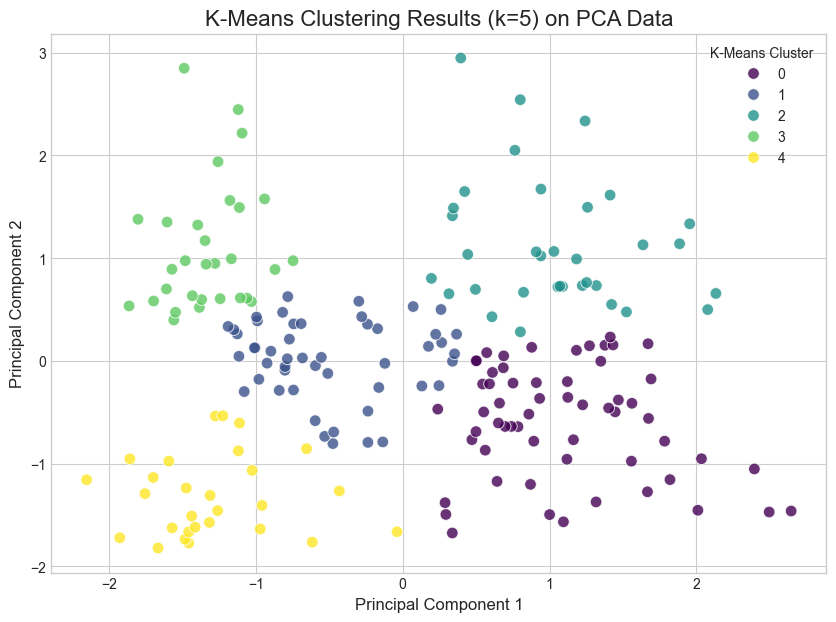


Discussion:
1.  **Score Interpretation:**
    - **Silhouette Score:** Higher values (closer to 1) are preferred. Based on the scores, identify which algorithm achieved the highest Silhouette Score.
    - **Davies-Bouldin Index:** Lower values (closer to 0) are preferred. Identify which algorithm achieved the lowest Davies-Bouldin score.
    - Often, the algorithm performing best on one metric also performs well on the other for well-defined clusters, but discrepancies can occur.

2.  **Algorithm Segmentation Differences:**
    - **K-Means:** Tends to find spherical clusters of similar size due to its reliance on minimizing Euclidean distance to centroids (inertia). It produced hard assignments.
    - **Agglomerative (Ward):** Builds a hierarchy. Ward linkage aims to minimize variance within clusters, often leading to results similar to K-Means for globular clusters found in this PCA representation. Hard assignments.
    - **GMM:** Assumes clusters are Gaussian distributions. Can model

In [14]:
# --- Continuation from BIRCH Clustering ---
# Assume data_for_clustering (pca_df), optimal_k, and pca_df_with_clusters are available.

from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns # For visualization in discussion

# --- 12. Evaluate Clustering Methods ---

# Ensure the data used for scoring is the same data used for clustering
# In this case, it's the 2D PCA data
evaluation_data = data_for_clustering

# Dictionary to store the labels from each algorithm
cluster_labels_dict = {
    'K-Means': pca_df_with_clusters['Cluster'],
    'Agglomerative': pca_df_with_clusters['Agglomerative_Cluster'],
    'GMM': pca_df_with_clusters['GMM_Cluster'],
    'BIRCH': pca_df_with_clusters['BIRCH_Cluster']
}

# Dictionary to store evaluation scores
evaluation_scores = {}

print("\n--- Evaluating Clustering Performance ---")

for name, labels in cluster_labels_dict.items():
    # Calculate Silhouette Score
    # Higher is better (max 1), indicates dense, well-separated clusters.
    sil_score = silhouette_score(evaluation_data, labels)

    # Calculate Davies-Bouldin Index
    # Lower is better (min 0), indicates clusters are compact and well-separated.
    db_score = davies_bouldin_score(evaluation_data, labels)

    evaluation_scores[name] = {'Silhouette': sil_score, 'Davies-Bouldin': db_score}

    print(f"\n--- {name} ---")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}")

# --- 13. Comparison and Discussion ---

print("\n\n--- Comparison of Clustering Results ---")

# Display scores side-by-side for easier comparison
scores_df = pd.DataFrame(evaluation_scores).T # Transpose for better readability
print("\nEvaluation Scores Summary:")
print(scores_df)

# --- Visualization of Clusters (using K-Means as an example, can repeat for others) ---
# This helps visualize how different algorithms partition the data.

print("\nVisualizing Cluster Assignments (Example: K-Means on PCA data)")
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    # Use the DataFrame that has the cluster assignments
    data=pca_df_with_clusters,
    hue='Cluster', # Color by K-Means cluster label
    palette='viridis', # Use a distinct color palette
    s=70,
    alpha=0.8,
    legend='full'
)
# Optionally plot K-Means centers (if available and desired)
# kmeans_centers_pca = kmeans_final.cluster_centers_ # Get centers from the trained K-Means model
# plt.scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1],
#             s=250, marker='X', c='red', edgecolor='black', label='Centroids (K-Means)')

plt.title(f'K-Means Clustering Results (k={optimal_k}) on PCA Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.legend(title='K-Means Cluster')
plt.show()

# --- Discussion Points ---

print("\nDiscussion:")
print("1.  **Score Interpretation:**")
print("    - **Silhouette Score:** Higher values (closer to 1) are preferred. Based on the scores, identify which algorithm achieved the highest Silhouette Score.")
print("    - **Davies-Bouldin Index:** Lower values (closer to 0) are preferred. Identify which algorithm achieved the lowest Davies-Bouldin score.")
print("    - Often, the algorithm performing best on one metric also performs well on the other for well-defined clusters, but discrepancies can occur.")

print("\n2.  **Algorithm Segmentation Differences:**")
print("    - **K-Means:** Tends to find spherical clusters of similar size due to its reliance on minimizing Euclidean distance to centroids (inertia). It produced hard assignments.")
print("    - **Agglomerative (Ward):** Builds a hierarchy. Ward linkage aims to minimize variance within clusters, often leading to results similar to K-Means for globular clusters found in this PCA representation. Hard assignments.")
print("    - **GMM:** Assumes clusters are Gaussian distributions. Can model elliptical shapes ('covariance_type=full'). Provides soft probabilities, which can be useful for understanding uncertainty or overlap between clusters (check 'GMM_Probability' column and the probability distributions). The hard assignments ('GMM_Cluster') are based on the highest probability.")
print("    - **BIRCH:** Summarizes data into a CF-Tree first, then clusters the leaves. Designed for scalability. Results depend on the CF-Tree structure (threshold, branching factor) and the final clustering step. May slightly differ from methods working directly on points, especially if the threshold causes significant summarization.")
print("    - **Visual Inspection:** Looking at the scatter plots (like the K-Means one shown) for each algorithm's labels reveals how they partition the PCA space. Do they capture the visual groupings well? Are the boundaries similar or different?")

print("\n3.  **Suitability for this Dataset (Post-PCA):**")
print("    - **Data Structure:** The 2D PCA plot often shows distinct, somewhat globular groups for this dataset.")
print("    - **Performance:** Compare the evaluation scores. Algorithms like K-Means or Agglomerative (Ward) often score well here because their underlying assumptions (globular shapes, variance minimization) align reasonably well with the visual structure after PCA.")
print("    - **GMM Flexibility:** GMM might also perform well and could potentially model slightly elliptical shapes if present. Its probabilistic output offers more insight than hard clustering if cluster overlap is a concern.")
print("    - **BIRCH Scalability:** While effective, BIRCH's main advantage (scalability) isn't critical for this small dataset. Its performance relative to others depends heavily on parameter tuning.")
print("    - **Recommendation:** Based *purely on the scores* obtained on the 2D PCA data, the algorithm with the highest Silhouette Score and/or the lowest Davies-Bouldin Index would be quantitatively preferred. Often for this dataset after PCA, K-Means or Agglomerative (Ward) yield strong results according to these metrics. If interpretability of cluster shape or overlap is important, GMM offers advantages despite potentially slightly lower scores on these specific metrics.")
print("    - **Consideration:** The choice also depends on the end goal. If simple, distinct segments are needed, K-Means/Agglomerative might suffice. If a more nuanced understanding of cluster membership is needed, GMM is better.")

# Find and print the best performing based on metrics
best_silhouette = scores_df['Silhouette'].idxmax()
best_db = scores_df['Davies-Bouldin'].idxmin()

print(f"\nConclusion based on metrics:")
print(f"- Best Silhouette Score: {best_silhouette} ({scores_df.loc[best_silhouette, 'Silhouette']:.4f})")
print(f"- Best Davies-Bouldin Index: {best_db} ({scores_df.loc[best_db, 'Davies-Bouldin']:.4f})")
if best_silhouette == best_db:
    print(f"-> {best_silhouette} appears most suitable based on both metrics for this PCA-reduced data.")
else:
    print(f"-> {best_silhouette} (Silhouette) and {best_db} (Davies-Bouldin) show strong performance. Choice might depend on which metric is prioritized or further qualitative analysis.")


--- Visualizing Cluster Assignments for Each Method ---


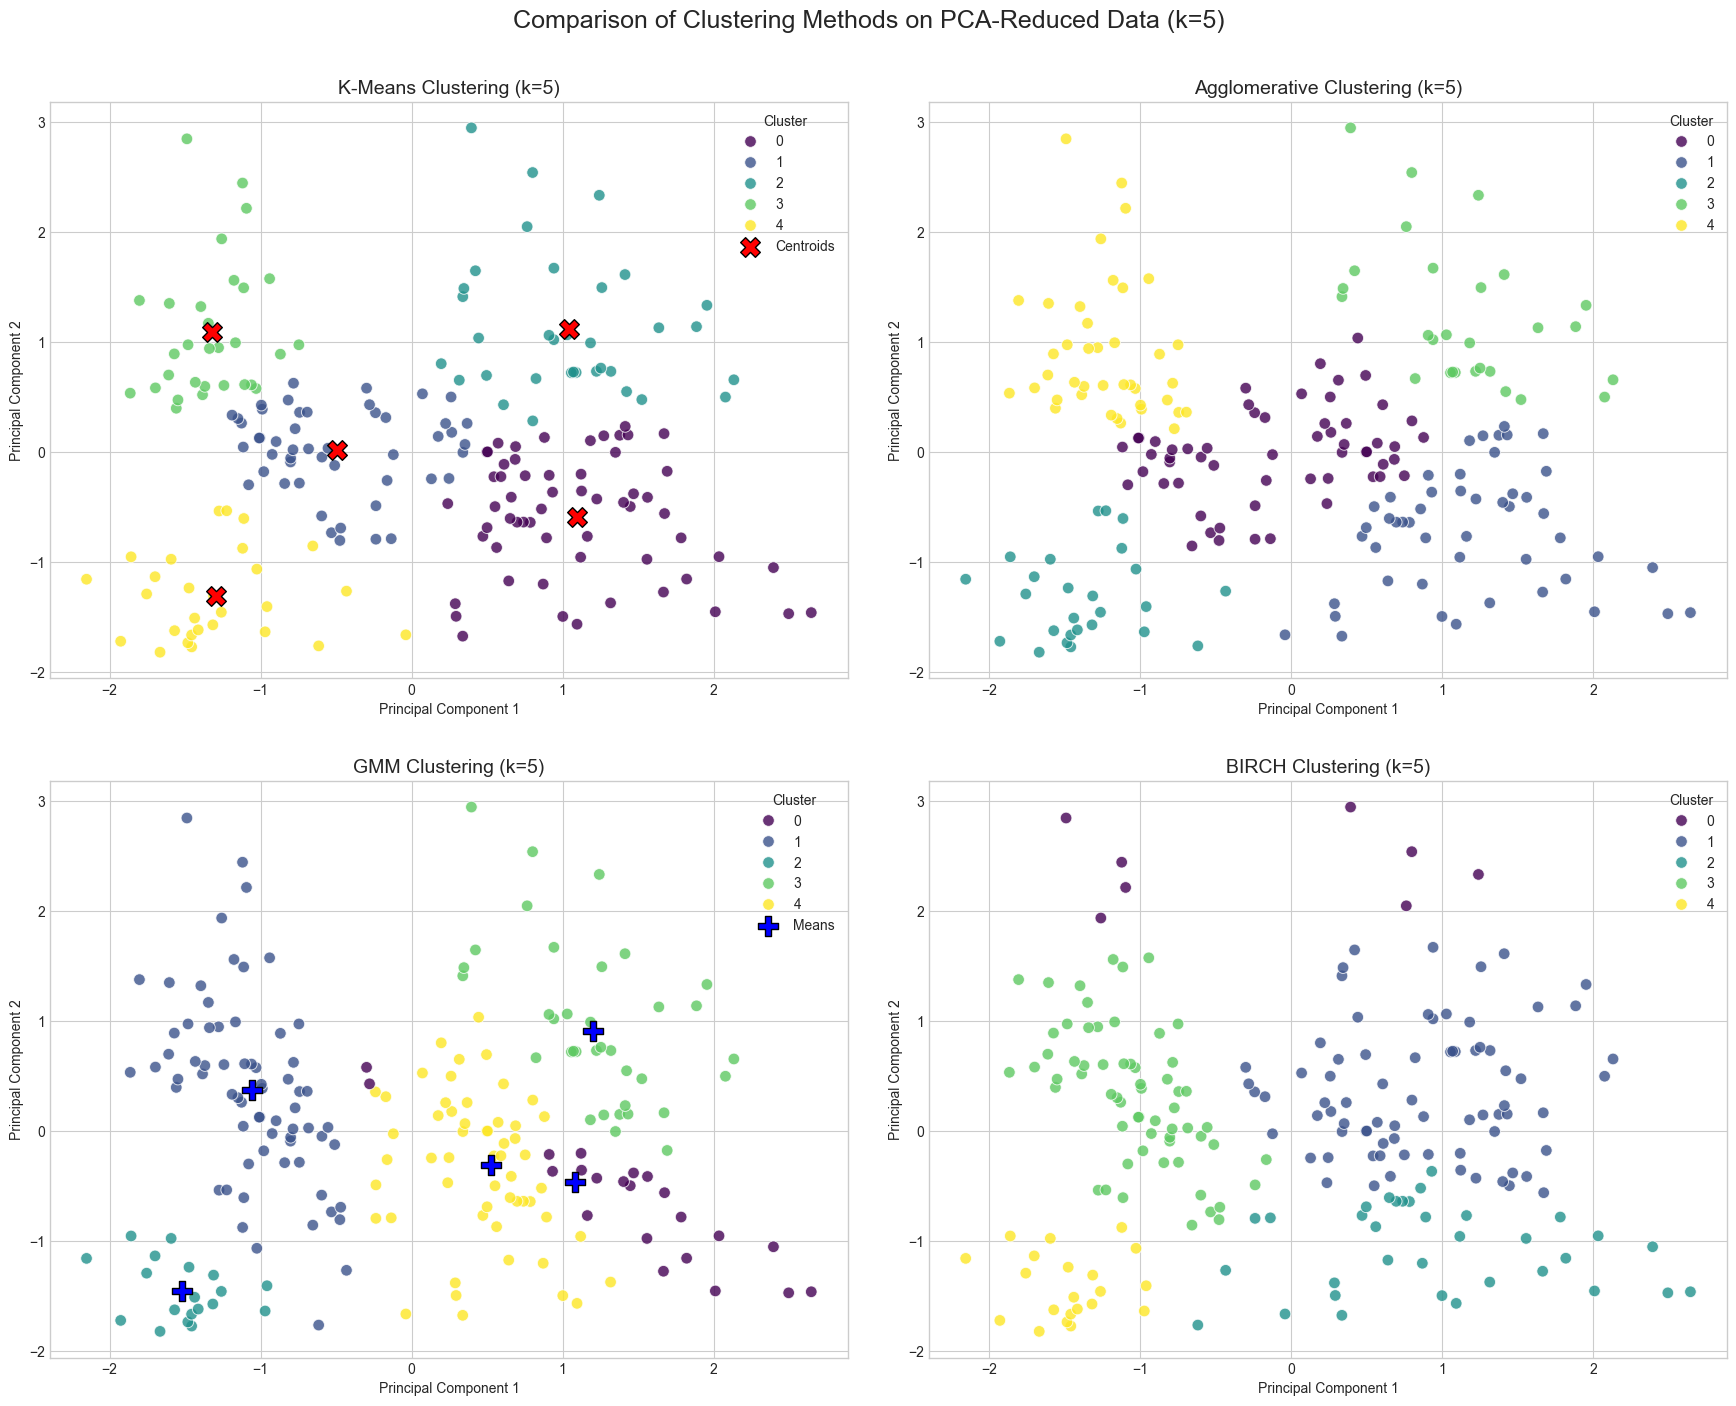


Visualizations complete. Each plot shows customer segments identified by a different algorithm.
Observe how the cluster boundaries and assignments differ across the methods.


In [15]:
# --- Continuation from Evaluation ---
# Assume pca_df_with_clusters, optimal_k, and cluster_labels_dict are available.
# import matplotlib.pyplot as plt # Already imported
# import seaborn as sns # Already imported

# --- 14. Visualize Clusters for Each Method ---

print("\n--- Visualizing Cluster Assignments for Each Method ---")

# List of cluster label column names in pca_df_with_clusters
# (assuming they match the keys in cluster_labels_dict)
cluster_column_names = {
    'K-Means': 'Cluster',
    'Agglomerative': 'Agglomerative_Cluster',
    'GMM': 'GMM_Cluster',
    'BIRCH': 'BIRCH_Cluster'
}

# Create a figure with subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Adjusted figsize for better layout
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

plot_index = 0
for method_name, cluster_col in cluster_column_names.items():
    if plot_index < len(axes): # Ensure we don't try to plot more than available subplots
        ax = axes[plot_index]
        sns.scatterplot(
            x='Principal Component 1',
            y='Principal Component 2',
            data=pca_df_with_clusters,
            hue=cluster_col, # Use the specific cluster label column for this method
            palette='viridis', # A good default palette, adjust if needed for more clusters
            s=70,
            alpha=0.8,
            legend='full', # Show legend
            ax=ax # Specify the subplot axis
        )

        # Optionally, plot centroids if available (e.g., for K-Means and GMM)
        if method_name == 'K-Means' and 'kmeans_final' in globals():
            kmeans_centers_pca = kmeans_final.cluster_centers_
            ax.scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1],
                       s=200, marker='X', c='red', edgecolor='black', label='Centroids')
        elif method_name == 'GMM' and 'gmm' in globals():
            gmm_centers_pca = gmm.means_ # GMM stores means (centroids) in .means_
            ax.scatter(gmm_centers_pca[:, 0], gmm_centers_pca[:, 1],
                       s=200, marker='P', c='blue', edgecolor='black', label='Means') # 'P' for plus sign marker

        ax.set_title(f'{method_name} Clustering (k={optimal_k})', fontsize=14)
        ax.set_xlabel('Principal Component 1', fontsize=10)
        ax.set_ylabel('Principal Component 2', fontsize=10)
        ax.grid(True)
        ax.legend(title='Cluster') # Set legend title

        plot_index += 1

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(pad=3.0) # Add some padding between subplots
plt.suptitle(f'Comparison of Clustering Methods on PCA-Reduced Data (k={optimal_k})', fontsize=18, y=1.02) # Main title
plt.show()

print("\nVisualizations complete. Each plot shows customer segments identified by a different algorithm.")
print("Observe how the cluster boundaries and assignments differ across the methods.")